In [743]:
!pip install -r requirements.txt

In [744]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [745]:
#Dataset import
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
pokemon=pd.read_csv('pokemon.csv')

In [746]:
#Show Preview Dataset
train

,Winner,First_pokemon,Second_pokemon
0,396,783,396
1,146,146,411
2,744,203,744
3,559,733,559
4,431,431,87
...,...,...,...
31995,431,25,431
31996,328,505,328
31997,7,7,29
31998,117,753,117


In [747]:
#Show Preview Dataset
test

,Winner,First_pokemon,Second_pokemon
0,24,366,24
1,728,728,305
2,462,791,462
3,702,683,702
4,336,345,336
...,...,...,...
7995,585,569,585
7996,314,62,314
7997,334,334,15
7998,306,240,306


In [748]:
#Show Preview Dataset
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [749]:
#Counting Missing Values(train)
missing_values_count = train.isnull().sum()
missing_values_count

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

In [750]:
#Counting Missing Values(test)
missing_values_count = test.isnull().sum()
missing_values_count

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

In [751]:
#Counting Missing Values
missing_values_count = pokemon.isnull().sum()
missing_values_count

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [752]:
#View Null Element
pokemon[pokemon['Name'].isnull()]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


In [753]:
pokemon[60:]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
60,61,Golduck,Water,NaN,80,82,78,95,80,85,1,False
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70,1,False
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False
63,64,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False
64,65,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [754]:
#Modify Name
pokemon.loc[62,'Name']='Primape'

In [755]:
#Drop Column(dopo aver notato che quasi il 50% dei pokemon non presenta un type 2 decido di droppare la colonna Type 2)
pokemon=pokemon.drop('Type 2',axis=1)

In [756]:
#Merge Files First Pokemon
test1=pd.merge(test, pokemon, left_on='First_pokemon', right_on='#').drop('#', axis=1)
train1=pd.merge(train, pokemon, left_on='First_pokemon', right_on='#').drop('#', axis=1)
train1

,Winner,First_pokemon,Second_pokemon,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,396,783,396,Pumpkaboo Large Size,Ghost,54,66,70,44,55,46,6,False
1,783,783,346,Pumpkaboo Large Size,Ghost,54,66,70,44,55,46,6,False
2,783,783,640,Pumpkaboo Large Size,Ghost,54,66,70,44,55,46,6,False
3,783,783,624,Pumpkaboo Large Size,Ghost,54,66,70,44,55,46,6,False
4,672,783,672,Pumpkaboo Large Size,Ghost,54,66,70,44,55,46,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,326,326,577,Delcatty,Normal,70,65,65,55,55,70,3,False
31996,326,326,324,Delcatty,Normal,70,65,65,55,55,70,3,False
31997,480,326,480,Delcatty,Normal,70,65,65,55,55,70,3,False
31998,669,326,669,Delcatty,Normal,70,65,65,55,55,70,3,False


In [757]:
#Merge Files Second Pokemon
test2=pd.merge(test1, pokemon, left_on='Second_pokemon', right_on='#').drop('#', axis=1)
train2=pd.merge(train1, pokemon, left_on='Second_pokemon', right_on='#').drop('#', axis=1)
train2

,Winner,First_pokemon,Second_pokemon,Name_x,Type 1_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Generation_x,Legendary_x,Name_y,Type 1_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Generation_y,Legendary_y
0,396,783,396,Pumpkaboo Large Size,Ghost,54,66,70,44,55,46,6,False,Snorunt,Ice,50,50,50,50,50,50,3,False
1,377,377,396,Claydol,Ground,60,70,105,70,120,75,3,False,Snorunt,Ice,50,50,50,50,50,50,3,False
2,396,639,396,Solosis,Psychic,45,30,40,105,50,20,5,False,Snorunt,Ice,50,50,50,50,50,50,3,False
3,261,261,396,Miltank,Normal,95,80,105,40,70,100,2,False,Snorunt,Ice,50,50,50,50,50,50,3,False
4,670,670,396,Lampent,Ghost,60,40,60,95,60,55,5,False,Snorunt,Ice,50,50,50,50,50,50,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,277,531,277,Froslass,Ice,70,80,70,80,70,110,4,False,Torchic,Fire,45,60,40,70,50,45,3,False
31996,320,320,277,Exploud,Normal,104,91,63,91,73,68,3,False,Torchic,Fire,45,60,40,70,50,45,3,False
31997,517,517,277,Tangrowth,Grass,100,100,125,110,50,50,4,False,Torchic,Fire,45,60,40,70,50,45,3,False
31998,635,635,277,Cinccino,Normal,75,95,60,65,60,115,5,False,Torchic,Fire,45,60,40,70,50,45,3,False


In [758]:
#Replace Winner with 1 or 2 
test2.Winner=test2.Winner.where((test2.Winner!=test2.First_pokemon),1)
train2.Winner=train2.Winner.where((train2.Winner!=train2.First_pokemon),1)
test2

,Winner,First_pokemon,Second_pokemon,Name_x,Type 1_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Generation_x,Legendary_x,Name_y,Type 1_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Generation_y,Legendary_y
0,24,366,24,Altaria,Dragon,75,70,90,70,105,80,3,False,Mega Pidgeot,Normal,83,80,80,135,80,121,1,False
1,1,163,24,Mewtwo,Psychic,106,110,90,154,90,130,1,True,Mega Pidgeot,Normal,83,80,80,135,80,121,1,False
2,24,235,24,Teddiursa,Normal,60,80,50,50,50,40,2,False,Mega Pidgeot,Normal,83,80,80,135,80,121,1,False
3,24,99,24,Cloyster,Water,50,95,180,85,45,70,1,False,Mega Pidgeot,Normal,83,80,80,135,80,121,1,False
4,24,361,24,Vibrava,Ground,50,70,50,50,50,70,3,False,Mega Pidgeot,Normal,83,80,80,135,80,121,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1,657,402,Joltik,Bug,50,47,50,57,50,65,5,False,Clamperl,Water,35,64,85,74,55,32,3,False
7996,1,744,402,Pangoro,Fighting,95,124,78,69,71,58,6,False,Clamperl,Water,35,64,85,74,55,32,3,False
7997,1,192,402,Natu,Psychic,40,50,45,70,45,70,2,False,Clamperl,Water,35,64,85,74,55,32,3,False
7998,519,446,519,Bibarel,Normal,79,85,60,55,60,71,4,False,Magmortar,Fire,75,95,67,125,95,83,4,False


In [759]:
#Replace Winner with 1 or 2 
train2.Winner=train2.Winner.where((train2.Winner!=train2.Second_pokemon),2)
test2.Winner=test2.Winner.where((test2.Winner!=test2.Second_pokemon),2)
train2

,Winner,First_pokemon,Second_pokemon,Name_x,Type 1_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Generation_x,Legendary_x,Name_y,Type 1_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Generation_y,Legendary_y
0,2,783,396,Pumpkaboo Large Size,Ghost,54,66,70,44,55,46,6,False,Snorunt,Ice,50,50,50,50,50,50,3,False
1,1,377,396,Claydol,Ground,60,70,105,70,120,75,3,False,Snorunt,Ice,50,50,50,50,50,50,3,False
2,2,639,396,Solosis,Psychic,45,30,40,105,50,20,5,False,Snorunt,Ice,50,50,50,50,50,50,3,False
3,1,261,396,Miltank,Normal,95,80,105,40,70,100,2,False,Snorunt,Ice,50,50,50,50,50,50,3,False
4,1,670,396,Lampent,Ghost,60,40,60,95,60,55,5,False,Snorunt,Ice,50,50,50,50,50,50,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,2,531,277,Froslass,Ice,70,80,70,80,70,110,4,False,Torchic,Fire,45,60,40,70,50,45,3,False
31996,1,320,277,Exploud,Normal,104,91,63,91,73,68,3,False,Torchic,Fire,45,60,40,70,50,45,3,False
31997,1,517,277,Tangrowth,Grass,100,100,125,110,50,50,4,False,Torchic,Fire,45,60,40,70,50,45,3,False
31998,1,635,277,Cinccino,Normal,75,95,60,65,60,115,5,False,Torchic,Fire,45,60,40,70,50,45,3,False


In [760]:
#Feature to encode
le = preprocessing.LabelEncoder()
#Feature Encoding
for l in train2:
  if ((l=='Type 1_x	')|(l=='Type 2_x')|(l=='Type 1_y')|(l=='Type 2_y')):
    train2[l]=le.fit_transform(train2[l].astype(str))
    test2[l]=le.fit_transform(test2[l].astype(str))

#Label Encoding
le = preprocessing.LabelEncoder()
test2 = test2.apply(le.fit_transform)
train2 = train2.apply(le.fit_transform)

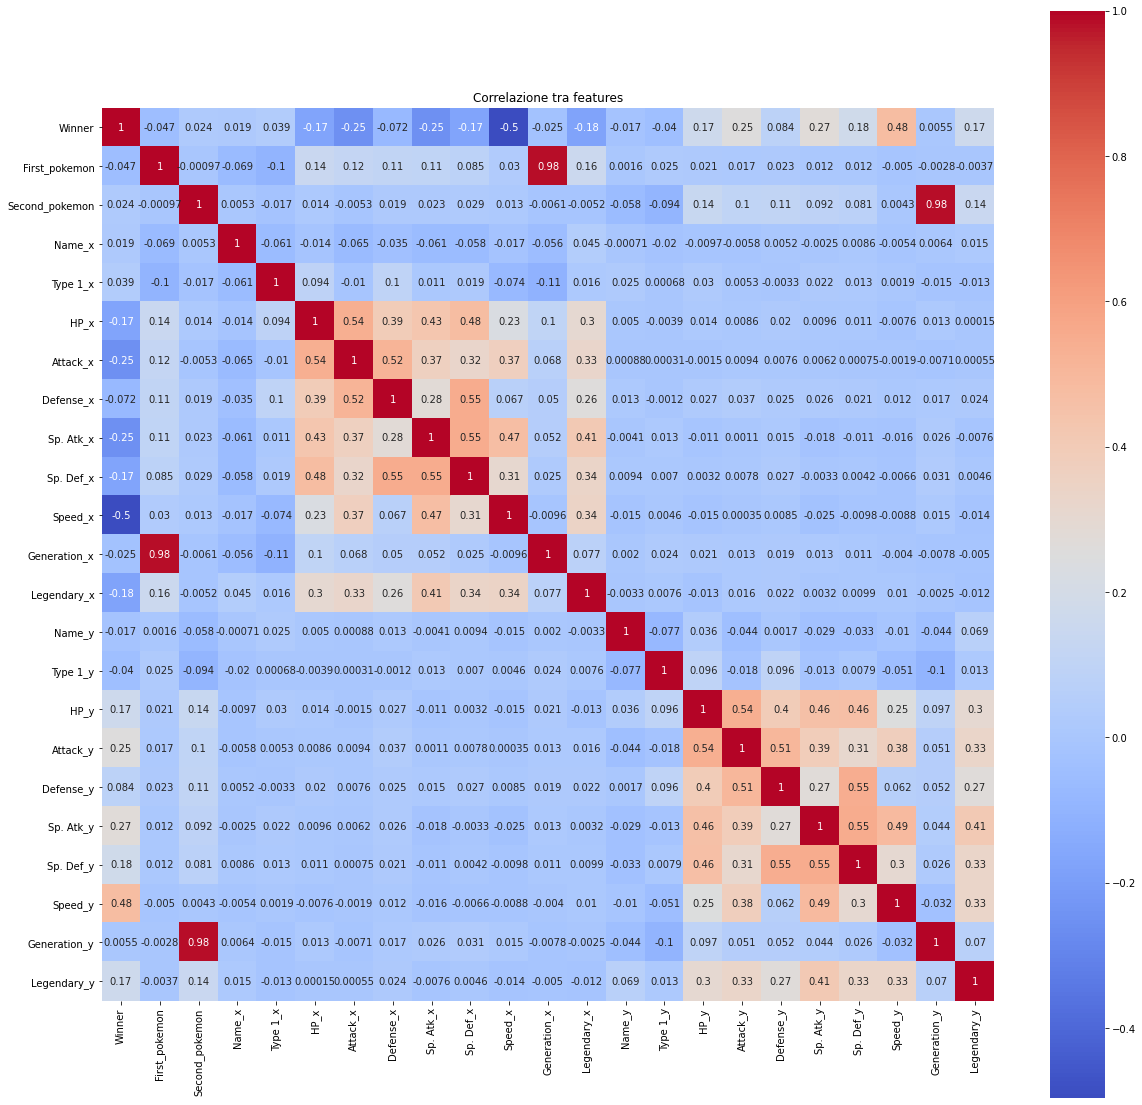

In [761]:
#Correlation Graphic
correlation = test2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=1,  cmap='coolwarm', square=True,annot=True)
plt.title('Correlazione tra features')
plt.show()

In [762]:
#Delete Uncorrelated Feature (Studiando la Matrice di correlazione decido di droppare tutte le feature con una correlazione con winner con modulo sotto lo 0.09)
train2=train2.drop(axis=1, columns='First_pokemon')
train2=train2.drop(axis=1, columns='Second_pokemon')
train2=train2.drop(axis=1, columns='Name_x')
train2=train2.drop(axis=1, columns='Name_y')
train2=train2.drop(axis=1, columns='Generation_x')
train2=train2.drop(axis=1, columns='Generation_y')
train2=train2.drop(axis=1, columns='Defense_x')
train2=train2.drop(axis=1, columns='Defense_y')
train2=train2.drop(axis=1, columns='Type 1_x')
train2=train2.drop(axis=1, columns='Type 1_y')

In [763]:
test2=test2.drop(axis=1, columns='First_pokemon')
test2=test2.drop(axis=1, columns='Second_pokemon')
test2=test2.drop(axis=1, columns='Name_x')
test2=test2.drop(axis=1, columns='Name_y')
test2=test2.drop(axis=1, columns='Generation_x')
test2=test2.drop(axis=1, columns='Generation_y')
test2=test2.drop(axis=1, columns='Defense_x')
test2=test2.drop(axis=1, columns='Defense_y')
test2=test2.drop(axis=1, columns='Type 1_x')
test2=test2.drop(axis=1, columns='Type 1_y')

Effettuo una differenza tra le stats del primo con il secondo pokemon per rendere di piu semplice interpretazione i dati, inoltre ho notato una particolare analogia tra la correlazione di una stats del primo pokemon con la variabile winner e la correlazione di una stats del secondo pokemon sempre con winner,infine questa operazione aumenta considerevolmente la precisione con ogni modello

In [764]:
train2['HP']=train2['HP_x']-train2['HP_y']
train2=train2.drop('HP_x', axis=1)
train2=train2.drop('HP_y', axis=1)

train2['Attack']=train2['Attack_x']-train2['Attack_y']
train2=train2.drop('Attack_x', axis=1)
train2=train2.drop('Attack_y', axis=1)

train2['Sp. Atk']=train2['Sp. Atk_x']-train2['Sp. Atk_y']
train2=train2.drop('Sp. Atk_x', axis=1)
train2=train2.drop('Sp. Atk_y', axis=1)

train2['Sp. Def']=train2['Sp. Def_x']-train2['Sp. Def_y']
train2=train2.drop('Sp. Def_x', axis=1)
train2=train2.drop('Sp. Def_y', axis=1)

train2['Speed']=train2['Speed_x']-train2['Speed_y']
train2=train2.drop('Speed_x', axis=1)
train2=train2.drop('Speed_y', axis=1)

In [765]:
test2['HP']=test2['HP_x']-test2['HP_y']
test2=test2.drop('HP_x', axis=1)
test2=test2.drop('HP_y', axis=1)

test2['Attack']=test2['Attack_x']-test2['Attack_y']
test2=test2.drop('Attack_x', axis=1)
test2=test2.drop('Attack_y', axis=1)

test2['Sp. Atk']=test2['Sp. Atk_x']-test2['Sp. Atk_y']
test2=test2.drop('Sp. Atk_x', axis=1)
test2=test2.drop('Sp. Atk_y', axis=1)

test2['Sp. Def']=test2['Sp. Def_x']-test2['Sp. Def_y']
test2=test2.drop('Sp. Def_x', axis=1)
test2=test2.drop('Sp. Def_y', axis=1)

test2['Speed']=test2['Speed_x']-test2['Speed_y']
test2=test2.drop('Speed_x', axis=1)
test2=test2.drop('Speed_y', axis=1)

In [766]:
trainY=train2['Winner']
testY=test2['Winner']
trainX=train2.drop('Winner', axis=1)
testX=test2.drop('Winner', axis=1)

In [767]:
#Model training and score
model = DecisionTreeClassifier(max_leaf_nodes=6,random_state=8, criterion='entropy')
model.fit(trainX, trainY)
prediction = model.predict(testX)
print('Accuracy:', (accuracy_score(testY, prediction)* 100), "%")

Accuracy: 93.86250000000001 %


In [768]:
#Model training and score
forest = RandomForestClassifier()
forest.fit(trainX, trainY)
prediction = forest.predict(testX)
print('Accuracy:',(accuracy_score(testY, prediction)* 100), "%")

Accuracy: 94.69999999999999 %


Text(0.5, 15.0, 'Predicted label')

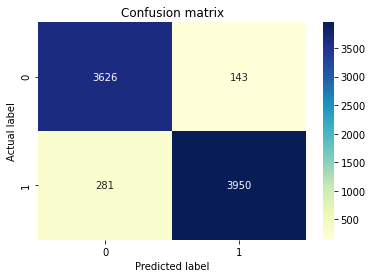

In [769]:
#Confusion Matrix
predY = forest.predict(testX)

cnf_matrix = metrics.confusion_matrix(testY, predY)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Una volta terminati i test decido di utilizzare il Random Forest Classifier poichè con questo Dataset è il modello che ha dato i migliori risultati.
